In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import patsy
import statsmodels.api as sm
from umap import UMAP 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, adjusted_rand_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.cluster import DBSCAN




In [2]:
obesity=pd.read_csv('obesity.csv')
obesity.isnull().sum()
obesity.info()
#the data does not have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
#first we rename the variable types. 

obesity.rename(columns={'family_history_with_overweight': 'Family_Obesity'}, inplace=True)
obesity.rename(columns={'FAVC': 'High_Calories'}, inplace=True)
obesity.rename(columns={'FCVC': 'Vegetables'}, inplace=True)
obesity.rename(columns={'NCP': 'Meals'}, inplace=True)
obesity.rename(columns={'CAEC': 'Food_Between_Meals'}, inplace=True)
obesity.rename(columns={'SMOKE': 'Smoke'}, inplace=True)
obesity.rename(columns={'CH2O': 'Water'}, inplace=True)
obesity.rename(columns={'SCC': 'Monitor_Calories'}, inplace=True)
obesity.rename(columns={'FAF': 'Excercise'}, inplace=True)
obesity.rename(columns={'TUE': 'Technology'}, inplace=True)
obesity.rename(columns={'CALC': 'Alcohol'}, inplace=True)
obesity.rename(columns={'MTRANS': 'Transportation_Movement'}, inplace=True)


In [4]:
obesity.head()

,Gender,Age,Height,Weight,Family_Obesity,High_Calories,Vegetables,Meals,Food_Between_Meals,Smoke,Water,Monitor_Calories,Excercise,Technology,Alcohol,Transportation_Movement,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
from sklearn.preprocessing import StandardScaler
categorical_mapping = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3 }
obesity['Alcohol'] = obesity['Alcohol'].map(categorical_mapping)
obesity['Food_Between_Meals'] = obesity['Food_Between_Meals'].map(categorical_mapping)

numerical_columns = ['Age', 'Height', 'Weight', 'Vegetables', 'Meals', 'Food_Between_Meals', 'Water', 'Excercise', 'Technology', 'Alcohol']
scaler = StandardScaler()
obesity[numerical_columns] = scaler.fit_transform(obesity[numerical_columns])

In [6]:
obesity.head()

,Gender,Age,Height,Weight,Family_Obesity,High_Calories,Vegetables,Meals,Food_Between_Meals,Smoke,Water,Monitor_Calories,Excercise,Technology,Alcohol,Transportation_Movement,NObeyesdad
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,-0.300346,no,-0.013073,no,-1.188039,0.561997,-1.419172,Public_Transportation,Normal_Weight
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,-0.300346,yes,1.618759,yes,2.339750,-1.080625,0.521160,Public_Transportation,Normal_Weight
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,-0.300346,no,-0.013073,no,1.163820,0.561997,2.461491,Public_Transportation,Normal_Weight
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,-0.300346,no,-0.013073,no,1.163820,-1.080625,2.461491,Walking,Overweight_Level_I
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,-0.300346,no,-0.013073,no,-1.188039,-1.080625,0.521160,Public_Transportation,Overweight_Level_II


In [7]:
# Identify the categorical columns to be one-hot encoded
categorical_columns = ['Gender', 'Family_Obesity', 'High_Calories', 'Smoke', 'Monitor_Calories', 'Transportation_Movement']

# Perform one-hot encoding
obesity = pd.get_dummies(obesity, columns=categorical_columns)

# Display the encoded DataFrame
print(obesity.head())

        Age    Height    Weight  Vegetables     Meals  Food_Between_Meals  \
0 -0.522124 -0.875589 -0.862558   -0.785019  0.404153           -0.300346   
1 -0.522124 -1.947599 -1.168077    1.088342  0.404153           -0.300346   
2 -0.206889  1.054029 -0.366090   -0.785019  0.404153           -0.300346   
3  0.423582  1.054029  0.015808    1.088342  0.404153           -0.300346   
4 -0.364507  0.839627  0.122740   -0.785019 -2.167023           -0.300346   

      Water  Excercise  Technology   Alcohol  ... High_Calories_yes  Smoke_no  \
0 -0.013073  -1.188039    0.561997 -1.419172  ...             False      True   
1  1.618759   2.339750   -1.080625  0.521160  ...             False     False   
2 -0.013073   1.163820    0.561997  2.461491  ...             False      True   
3 -0.013073   1.163820   -1.080625  2.461491  ...             False      True   
4 -0.013073  -1.188039   -1.080625  0.521160  ...             False      True   

   Smoke_yes  Monitor_Calories_no  Monitor_Calorie

In [8]:
obesity.head()

,Age,Height,Weight,Vegetables,Meals,Food_Between_Meals,Water,Excercise,Technology,Alcohol,...,High_Calories_yes,Smoke_no,Smoke_yes,Monitor_Calories_no,Monitor_Calories_yes,Transportation_Movement_Automobile,Transportation_Movement_Bike,Transportation_Movement_Motorbike,Transportation_Movement_Public_Transportation,Transportation_Movement_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.300346,-0.013073,-1.188039,0.561997,-1.419172,...,False,True,False,True,False,False,False,False,True,False
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,-0.300346,1.618759,2.339750,-1.080625,0.521160,...,False,False,True,False,True,False,False,False,True,False
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.300346,-0.013073,1.163820,0.561997,2.461491,...,False,True,False,True,False,False,False,False,True,False
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.300346,-0.013073,1.163820,-1.080625,2.461491,...,False,True,False,True,False,False,False,False,False,True
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.300346,-0.013073,-1.188039,-1.080625,0.521160,...,False,True,False,True,False,False,False,False,True,False


In [9]:
# obesity_labels = obesity.columns.tolist()
obesity_labels = obesity['NObeyesdad']
Cleaned_Data = obesity.drop('NObeyesdad', axis=1)
y = obesity['NObeyesdad']
print(obesity_labels)

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = Cleaned_Data
y = y
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [11]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [12]:
# Preview of the training dataset
X_train

,Age,Height,Weight,Vegetables,Meals,Food_Between_Meals,Water,Excercise,Technology,Alcohol,...,High_Calories_yes,Smoke_no,Smoke_yes,Monitor_Calories_no,Monitor_Calories_yes,Transportation_Movement_Automobile,Transportation_Movement_Bike,Transportation_Movement_Motorbike,Transportation_Movement_Public_Transportation,Transportation_Movement_Walking
1295,2.180837,-1.542294,-0.264440,-0.785019,0.404153,-0.300346,-1.196520,-1.188039,-1.080625,0.521160,...,True,True,False,True,False,True,False,False,False,False
1627,2.530338,0.222106,0.869314,-0.256800,1.394543,-0.300346,-1.644905,0.376558,-1.080625,-1.419172,...,True,True,False,True,False,True,False,False,False,False
1388,2.417280,-1.381675,-0.248216,-0.650845,0.375753,-0.300346,-0.880723,-1.188039,-1.080625,-1.419172,...,True,True,False,True,False,True,False,False,False,False
1318,-0.169486,0.636030,0.429379,-0.785019,0.404153,-0.300346,1.600435,1.669380,2.168551,-1.419172,...,True,True,False,True,False,False,False,False,True,False
648,-0.278243,0.222803,-1.325371,0.457808,0.404153,1.834434,-1.577820,-0.253878,1.205819,-1.419172,...,True,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-0.731460,-0.023620,-0.327900,-0.925401,-0.420811,-0.300346,1.250035,-1.188039,-0.861226,-1.419172,...,False,True,False,True,False,False,False,False,True,False
1731,0.983906,0.830364,1.299023,0.472452,0.404153,-0.300346,0.224143,-0.150035,-0.105044,0.521160,...,True,True,False,True,False,True,False,False,False,False
763,-0.522124,-0.875589,-0.633419,-0.785019,-2.167023,-2.435125,1.618759,-0.012109,-1.080625,0.521160,...,True,True,False,True,False,False,False,False,True,False
835,0.789315,-0.634323,-0.636982,-0.097591,0.404153,-0.300346,-0.132887,0.671390,-1.080625,0.521160,...,True,True,False,True,False,True,False,False,False,False


## Visualization using PCA, UMAP, and tSNE
Running UMAP might take 2-5 minutes. Run the plots at your discretion but otherwise assume the findings below are relatively accurate.

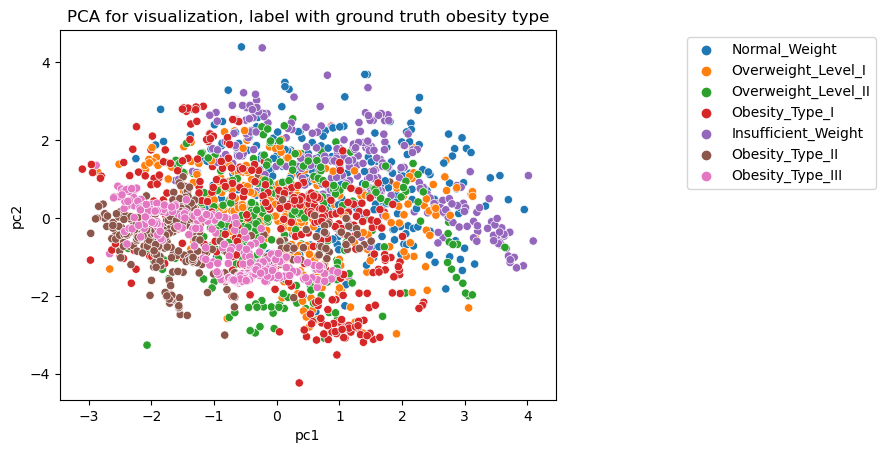

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

# call fit_transform on pca
pcs = pca.fit_transform(Cleaned_Data)

# transform it into data frame
pcs = pd.DataFrame(pcs,columns=['pc1','pc2'])
pcs.index = obesity.index
# plot the components
pcs['obesity_type'] = obesity_labels

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='obesity_type')
plt.title('PCA for visualization, label with ground truth obesity type')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.25, 1))

PCA gives us a nice overview of what's happening, although there is significant overlap between the different types of obesity. Let's keep experimenting with UMAP and observe our results.

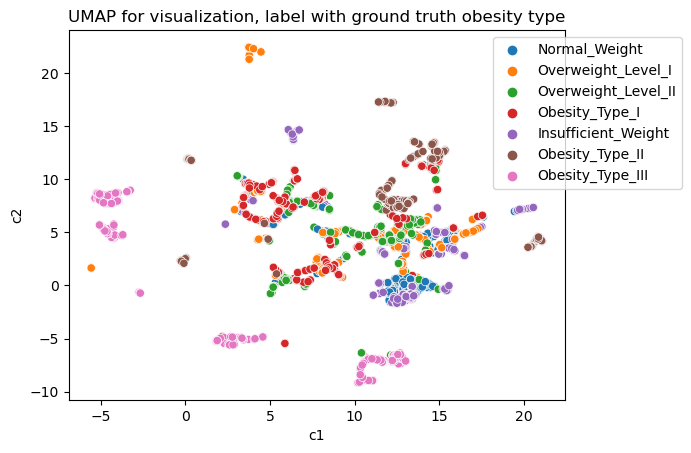

In [14]:
viz = UMAP(n_neighbors=5, min_dist=0.1)
viz_coords = pd.DataFrame(viz.fit_transform(Cleaned_Data), columns=['c1', 'c2'])
viz_coords['obesity_type'] = obesity_labels

sns.scatterplot(data=viz_coords, x='c1', y='c2', hue='obesity_type')
plt.title('UMAP for visualization, label with ground truth obesity type')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.25, 1))

Here's an output for umap n_neighbors = 5  for reference
![title](images/umap-5.jpeg)

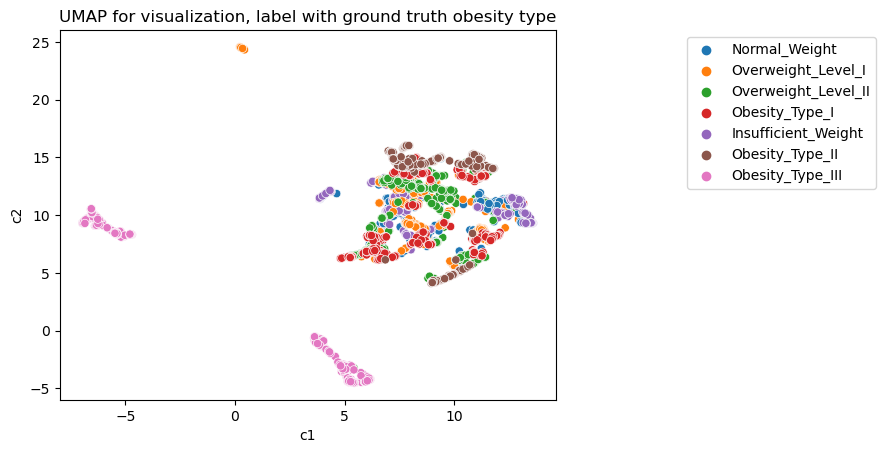

In [15]:
viz = UMAP(n_neighbors=20, min_dist=0.1)
viz_coords = pd.DataFrame(viz.fit_transform(Cleaned_Data), columns=['c1', 'c2'])
viz_coords['obesity_type'] = obesity_labels

sns.scatterplot(data=viz_coords, x='c1', y='c2', hue='obesity_type')
plt.title('UMAP for visualization, label with ground truth obesity type')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.25, 1))

Here's an output for umap n_neighbors = 20  for reference
![title](images/umap-20.jpeg)

## UMAP results
We sampled just two values of n_neighbors due to the sake of scope and computational complexity, but we can see that the data is tightly centered with little coherence in both cases. Obesity_Type_III appears to have a distinct separability from the rest of the labels, generally with a high degree of covariance. Let's try tSNE to see if we can get a a better picture of the data

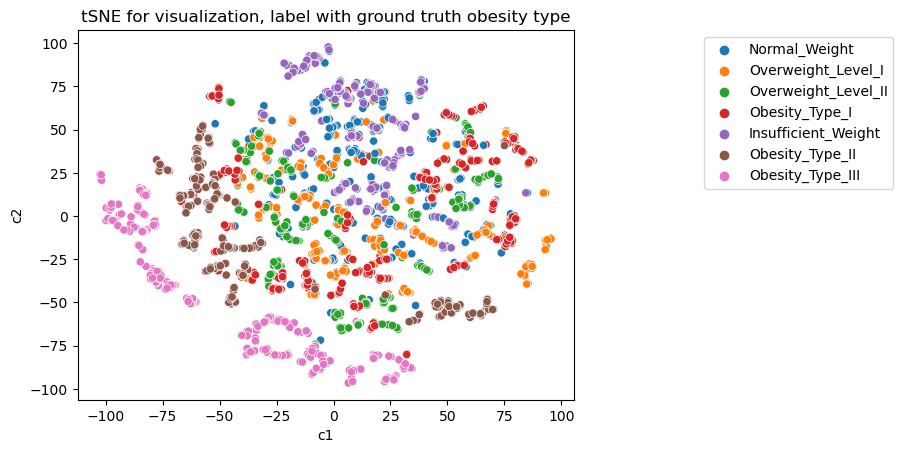

In [16]:
tsne_perp_5 = TSNE(n_components = 2, perplexity = 5, random_state = 99)
tcs = tsne_perp_5.fit_transform(Cleaned_Data)
# construct the data frame
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = obesity.index

tcs['obesity_type'] = obesity_labels

sns.scatterplot(data=tcs, x='c1', y='c2', hue='obesity_type')
plt.title('tSNE for visualization, label with ground truth obesity type')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.25, 1));



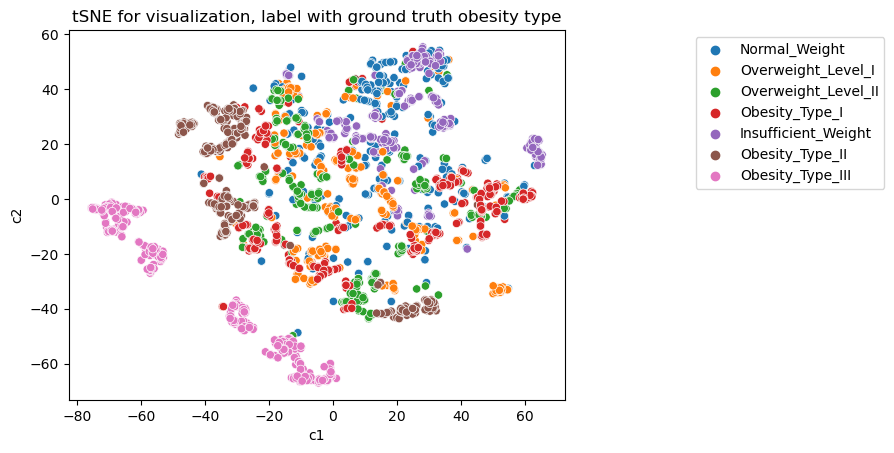

In [17]:
tsne_perp_20 = TSNE(n_components = 2, perplexity = 20, random_state = 99)
tcs = tsne_perp_20.fit_transform(Cleaned_Data)
# construct the data frame
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = obesity.index

tcs['obesity_type'] = obesity_labels

sns.scatterplot(data=tcs, x='c1', y='c2', hue='obesity_type')
plt.title('tSNE for visualization, label with ground truth obesity type')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.25, 1))



## tSNE Results
tSNE captures the local relationships so we do we see somewhat better results however at least in 2 dimensions, the data doesn't seem to adhere to the assumptions of classical models like KMeans nor GMM. Something like DBSCAN or Hierarchical clustering might offer a solution. We can try running KMeans as a baseline measure. Before moving on, we should first decide on an optimal perplexity parameter going forward to maintain consistent plots. We'll fine tune it  using the KL divergence as a performance metric

In [18]:
perplexities= [2, 5, 10, 20, 40, 80, 100, 200, 400]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.stats import gaussian_kde
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# Define range of perplexity values
REPS = 10  # Number of random starts

# Initialize arrays to store results
costs = []
all_perplexities = []

# Perform t-SNE for each perplexity value
for perplexity in perplexities:
        # Uses barnes hut approximation to speed up process
        tsne = TSNE(n_components=2, perplexity=perplexity, method='barnes_hut', n_iter=1000, random_state=99)
        embedded_data = tsne.fit_transform(Cleaned_Data)

        # Compute KL divergence
        kl_divergence = tsne.kl_divergence_

        # Store KL divergence and perplexity
        costs.append(kl_divergence)


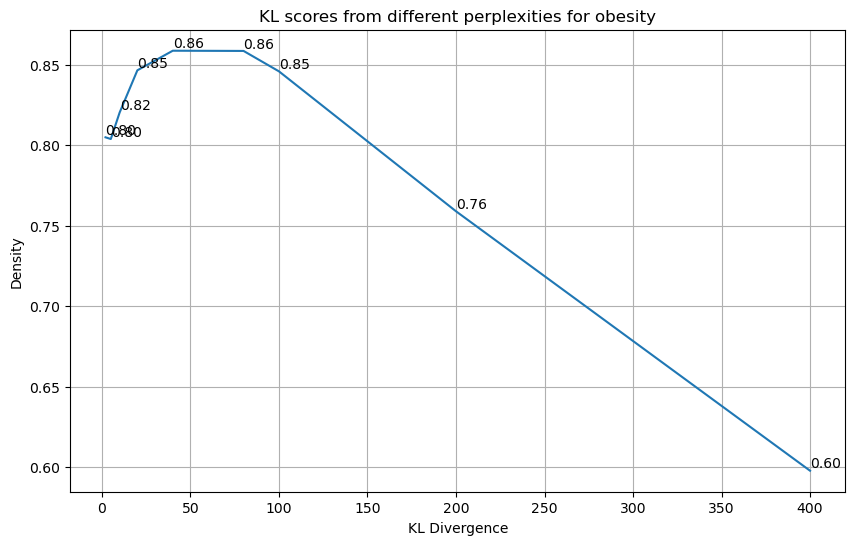

In [19]:
plt.figure(figsize=(10, 6))  # Set width to 10 inches and height to 6 inches

plt.plot(perplexities, costs)

plt.title('KL scores from different perplexities for obesity')
plt.xlabel('KL Divergence')
plt.ylabel('Density')  # Add ylabel for the y-axis

for i, (perplexity, cost) in enumerate(zip(perplexities, costs)):
    plt.text(perplexity, cost, f'{cost:.2f}', verticalalignment='bottom')

plt.grid()
plt.show()

We can see that a perplexity value of 100, gives us the best KL divergence score but 20 does as good a job. To keep things simple, we'll stick with 20.

In [29]:
tsne = TSNE(n_components=2, perplexity=20, method='barnes_hut', n_iter=1000, random_state=99)
tcs = tsne.fit_transform(Cleaned_Data)
embedded_data = tsne.fit_transform(Cleaned_Data)

Next, we will use the elbow to determine the number of clusters for the KMeans.

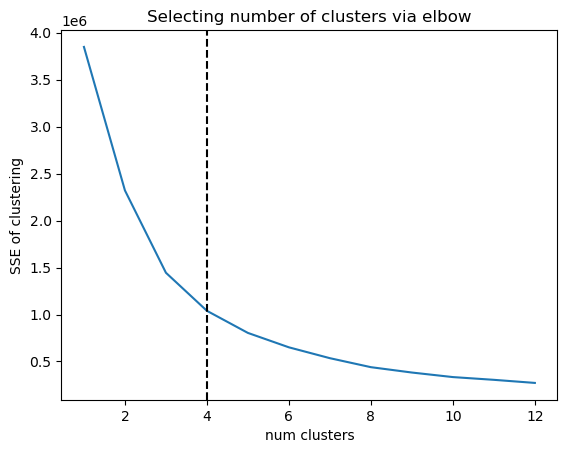

In [30]:
import sklearn.cluster as cluster
from kneed import KneeLocator

sse=[]
maxk = 13
for k in range(1,maxk):
    clust = cluster.KMeans(n_clusters=k)
    clust.fit(tcs)
    sse.append(clust.inertia_)

# finds the location of max curvature (max of double derivative)
location = KneeLocator(range(1,maxk), sse, S=1.0, curve="convex", direction="decreasing")

plt.plot(range(1,maxk),sse)
plt.axvline(location.elbow, color="black", linestyle="--")

plt.xlabel('num clusters')
plt.ylabel('SSE of clustering')
plt.title('Selecting number of clusters via elbow');

Using this number of 4, we will create silhouette analyses for a range around the number of clusters determined by the elbow for a better visual representation of the clusters.

For n_clusters = 3 The average silhouette_score is : 0.1289559760104075
For n_clusters = 4 The average silhouette_score is : 0.11525927759130065
For n_clusters = 5 The average silhouette_score is : 0.12637008171029984


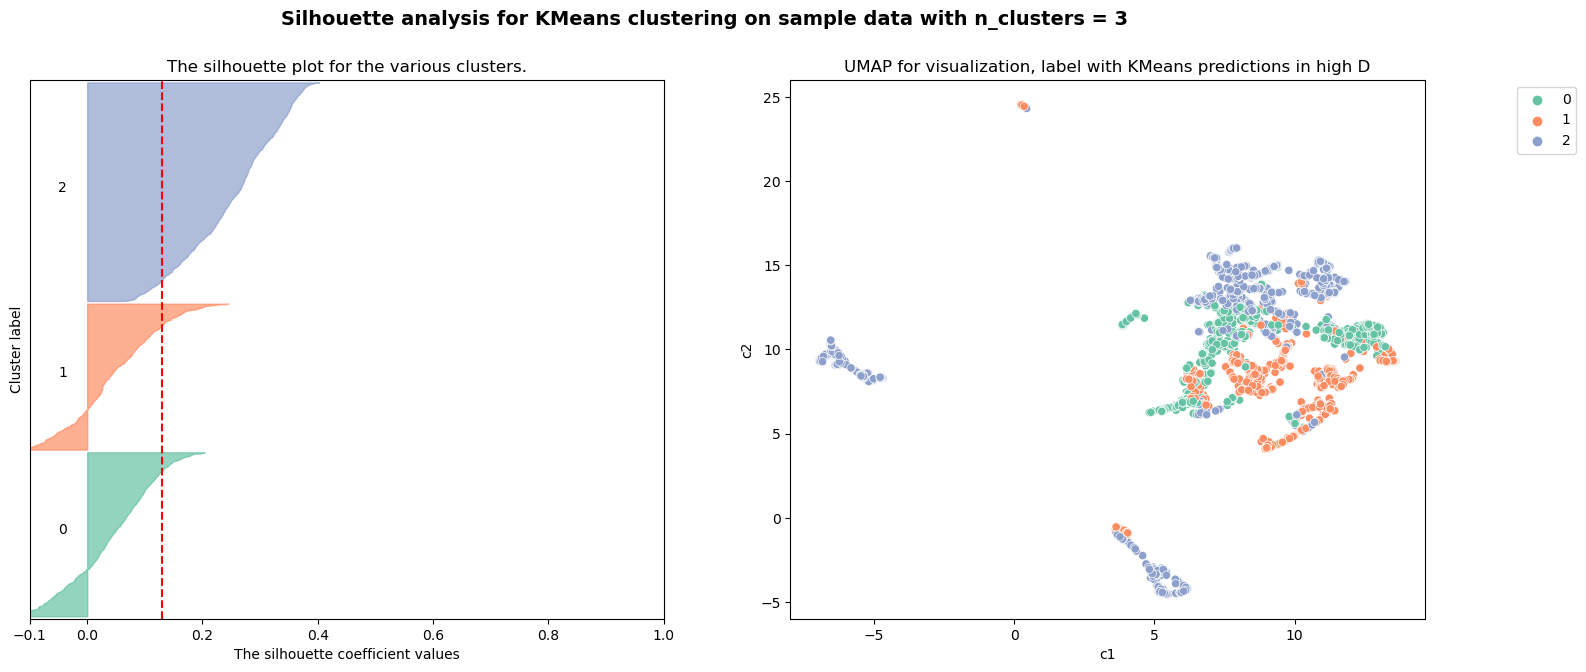

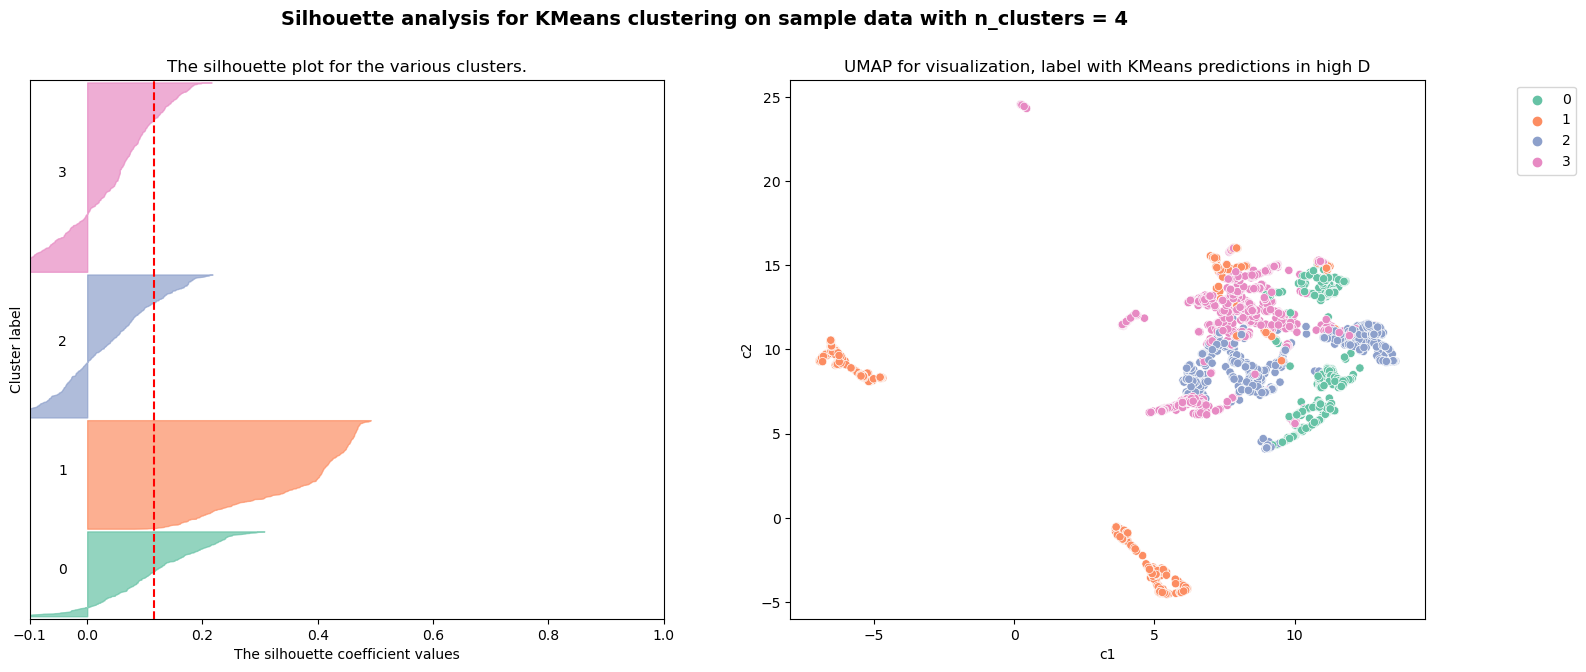

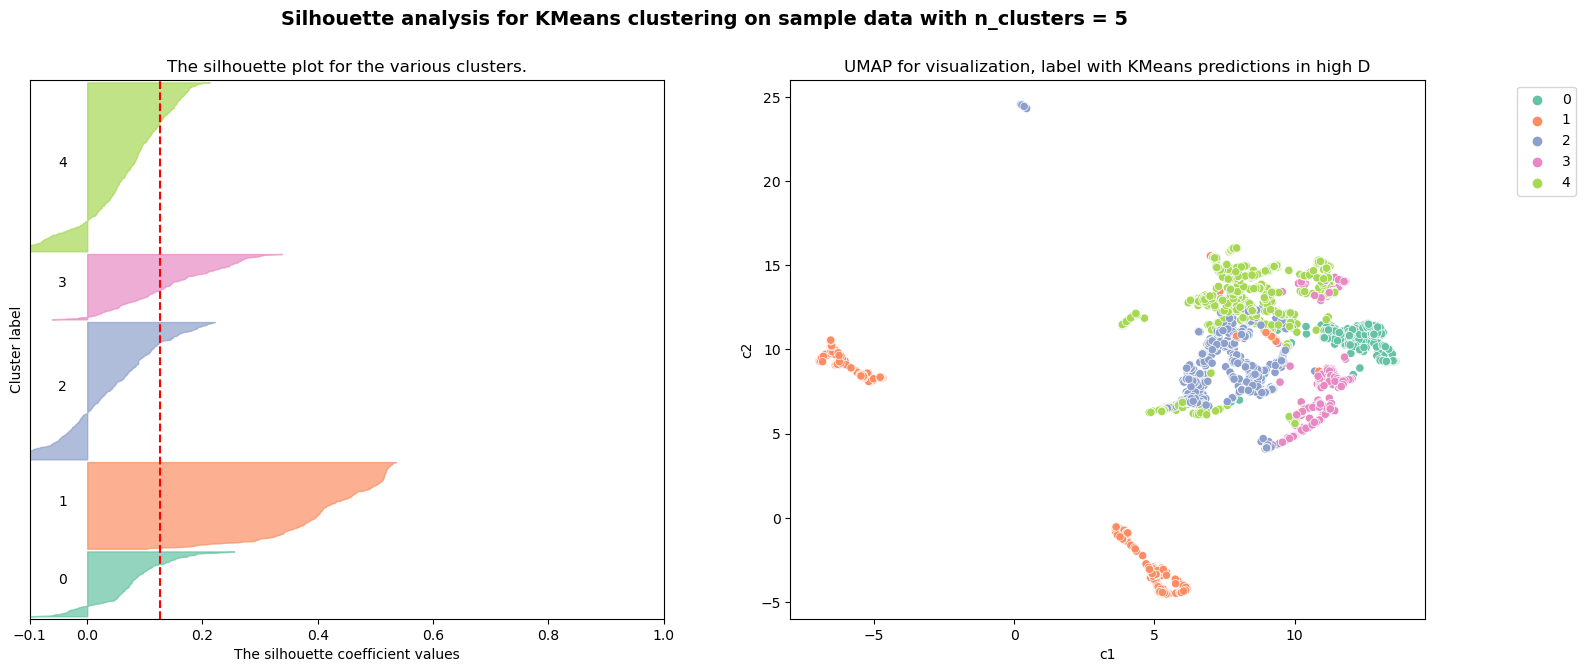

In [31]:
##copy/pasted from lecture notebook 19 and edited to be used for our data
### copy/pasted with some mods from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=Cleaned_Data.values #turn into numpy

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = sns.color_palette('Set2', n_clusters)[i]
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    
    predicted = clusterer.predict(X)
    viz_coords['prediction'] = predicted
    sns.scatterplot(data=viz_coords, x='c1', y='c2', hue='prediction', 
                    palette='Set2', ax=ax2)
    plt.title('UMAP for visualization, label with KMeans predictions in high D')
    ax2.legend(bbox_to_anchor=(1.25, 1));

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Looking at the silhouettes, it is easy to determine that clustering via KMeans is not what we should pursue for this data, which adheres to our previous findings with the t-SNE. Next, we will use a DBSCAN to better cluster our data.

In [32]:
tcs.shape

(2111, 2)

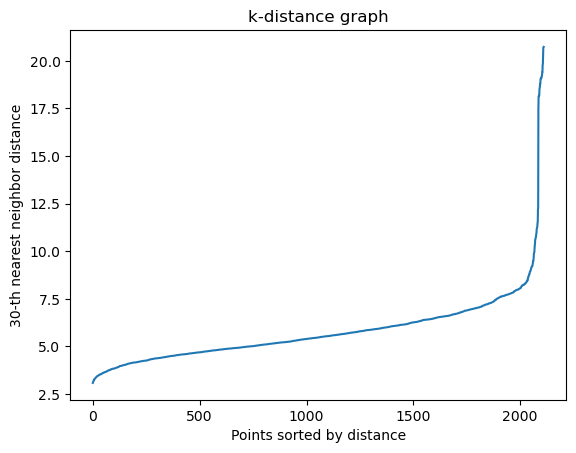

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute the distances to kth nearest neighbors
k = 30  # You may need to adjust this value based on your data
nbrs = NearestNeighbors(n_neighbors=k).fit(tcs)
distances, _ = nbrs.kneighbors(tcs)
distances = np.sort(distances[:, -1])

# Plot the sorted distances
plt.plot(distances)
plt.title('k-distance graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th nearest neighbor distance')
plt.show()

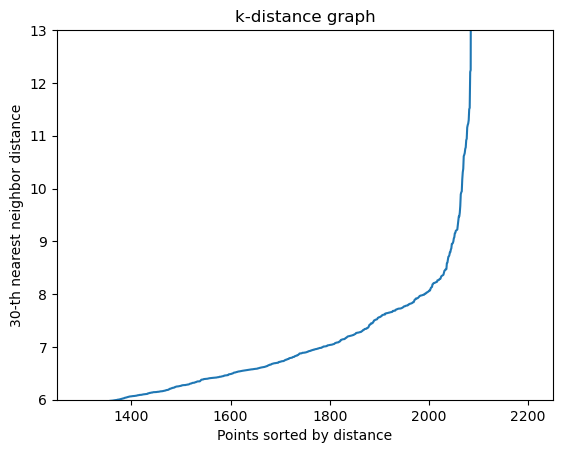

In [34]:
# Plot the sorted distances
plt.plot(distances)
plt.title('k-distance graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th nearest neighbor distance')

# Zoom in by setting x-axis limits
plt.xlim([1250, 2250])  # Adjust the limits based on your data
plt.ylim([6, 13])  # Adjust the limits based on your data

plt.show()

Looking at the elbow above, we can see that distance increases sharply after around 7. We played around with the numbers and saw that at k=65, the elbow was at 12. What we decided to do was test out all of them.

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# Assuming X_train contains the original training data and y_train contains the true labels (if available)

best_score = -1
best_params = None

for eps in [7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13]:  # Example values for eps
    for min_samples in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]:  # Example values for min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(tcs)
        labels = dbscan.labels_
        
        # Compute adjusted Rand index (if true labels are available)
        if obesity_labels is not None:
            score = adjusted_rand_score(obesity_labels, labels)
            print(f"eps={eps}, min_samples={min_samples}, Adjusted Rand Index: {score}")
        else:
            print(f"eps={eps}, min_samples={min_samples}, Labels: {set(labels)}")

        # Update best score and parameters
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters:", best_params)
print("Best Adjusted Rand Index:", best_score)

eps=7, min_samples=10, Adjusted Rand Index: 0.07985952171100055
eps=7, min_samples=20, Adjusted Rand Index: 0.07985952171100055
eps=7, min_samples=30, Adjusted Rand Index: 0.0796818971645743
eps=7, min_samples=40, Adjusted Rand Index: 0.15057016802131762
eps=7, min_samples=50, Adjusted Rand Index: 0.1599077809276124
eps=7, min_samples=60, Adjusted Rand Index: 0.07449791432444625
eps=7, min_samples=70, Adjusted Rand Index: 0.018452883867407625
eps=7, min_samples=80, Adjusted Rand Index: 0.0
eps=7, min_samples=90, Adjusted Rand Index: 0.0
eps=7, min_samples=100, Adjusted Rand Index: 0.0
eps=7, min_samples=110, Adjusted Rand Index: 0.0
eps=7, min_samples=120, Adjusted Rand Index: 0.0
eps=7, min_samples=130, Adjusted Rand Index: 0.0
eps=7, min_samples=140, Adjusted Rand Index: 0.0
eps=7, min_samples=150, Adjusted Rand Index: 0.0
eps=7.5, min_samples=10, Adjusted Rand Index: 0.07931399311668898
eps=7.5, min_samples=20, Adjusted Rand Index: 0.07931399311668898
eps=7.5, min_samples=30, Adjust

The Adjusted Rand Index is low at 0.15, but it is higher than 0, which means there is slight agreement.

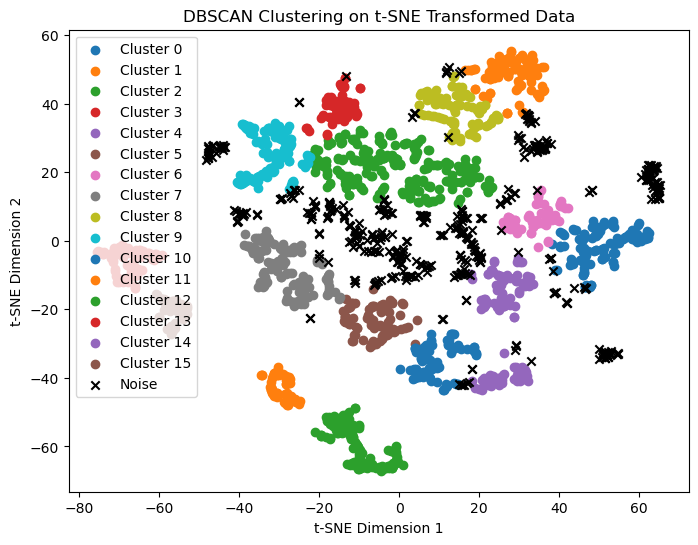

In [36]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN on the transformed data
dbscan = DBSCAN(eps=7, min_samples=50)
dbscan.fit(tcs)

# Extract cluster labels
cluster_labels = dbscan.labels_

# Number of clusters (ignore noise, represented by -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(tcs[cluster_labels == i][:, 0], tcs[cluster_labels == i][:, 1], label=f'Cluster {i}')
plt.scatter(tcs[cluster_labels == -1][:, 0], tcs[cluster_labels == -1][:, 1], color='black', marker='x', label='Noise')
plt.title('DBSCAN Clustering on t-SNE Transformed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [51]:
y_train

1295         Obesity_Type_I
1627        Obesity_Type_II
1388         Obesity_Type_I
1318         Obesity_Type_I
648     Insufficient_Weight
               ...         
1033    Overweight_Level_II
1731        Obesity_Type_II
763      Overweight_Level_I
835      Overweight_Level_I
1653        Obesity_Type_II
Name: NObeyesdad, Length: 1688, dtype: object

In [57]:
trained

DBSCAN(eps=7, min_samples=50)

In [56]:
# Instantiate the DBSCAN model with the best parameters
dbscan = DBSCAN(eps=7, min_samples=50)

# Train the DBSCAN model on the training data
trained = dbscan.fit(X_train)

# Obtain the cluster labels assigned by DBSCAN
cluster_labels = trained.labels_

ari = adjusted_rand_score(y_train, cluster_labels)
print(ari)

0.0


In [40]:
trans = TSNE(n_components=2, perplexity=20, method='barnes_hut', n_iter=1000, random_state=99)
scaler = StandardScaler()
dbscan = DBSCAN(eps = 7, min_samples = 50)
knn = KNeighborsClassifier(n_neighbors=20)

pipe = Pipeline([
    ('dim_reduce', trans),
    ('scaler', scaler),  # Scale the data after dimensionality reduction
    ('dbscan', dbscan),
    ('knn', knn)
])
pipe.fit(X_train, y_train)


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(perplexity=20, random_state=99)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't